This is a model for Car Price Prediction.

dataset: car_price_prediction.csv

**Work Flow**

Car data -> Data Pre-processing -> train-test -split -> Linear and Lasso Regression Model

Importing dependencies

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


Data Collection and processing

In [3]:
car_dataset = pd.read_csv("car_price_prediction.csv")

In [ ]:
car_dataset.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
car_dataset.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


Getting some infor about dataset

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
#cheking the number of missing values
car_dataset.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [ ]:
car_dataset['Color'].value_counts()


Color
Black            5033
White            4489
Silver           3792
Grey             2375
Blue             1396
Red               639
Green             322
Orange            253
Brown             187
Carnelian red     179
Golden            145
Beige             134
Sky blue          122
Yellow            106
Purple             39
Pink               26
Name: count, dtype: int64

In [ ]:
car_dataset['Category'].value_counts()

Category
Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: count, dtype: int64

In [ ]:
car_dataset['Doors'].value_counts()

Doors
04-May    18332
02-Mar      777
>5          128
Name: count, dtype: int64

In [ ]:
car_dataset['Drive wheels'].value_counts()

Drive wheels
Front    12874
4x4       4058
Rear      2305
Name: count, dtype: int64

In [ ]:
car_dataset['Gear box type'].value_counts()

Gear box type
Automatic    13514
Tiptronic     3102
Manual        1875
Variator       746
Name: count, dtype: int64

In [ ]:
car_dataset['Leather interior'].value_counts()

Leather interior
Yes    13954
No      5283
Name: count, dtype: int64

In [ ]:
car_dataset['Manufacturer'].value_counts()

Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64

In [ ]:
car_dataset['Wheel'].value_counts()

Wheel
Left wheel          17753
Right-hand drive     1484
Name: count, dtype: int64

In [ ]:
car_dataset['Model'].value_counts()

Model
Prius                    1083
Sonata                   1079
Camry                     938
Elantra                   922
E 350                     542
                         ... 
Feroza                      1
C-MAX C-MAX                 1
X1 4X4                      1
Land Cruiser Prado RX       1
Prius C aqua                1
Name: count, Length: 1590, dtype: int64

In [ ]:
#checking distribution of categorical data 
print(car_dataset['Fuel type'].value_counts())
print(car_dataset['Category'].value_counts())
print(car_dataset['Color'].value_counts())

Fuel type
1                 10150
0                  4036
3                  3578
LPG                 892
2                   494
Plug-in Hybrid       86
Hydrogen              1
Name: count, dtype: int64
Category
Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: count, dtype: int64
Color
Black            5033
White            4489
Silver           3792
Grey             2375
Blue             1396
Red               639
Green             322
Orange            253
Brown             187
Carnelian red     179
Golden            145
Beige             134
Sky blue          122
Yellow            106
Purple             39
Pink               26
Name: count, dtype: int64


Encoding Categorical Data

In [4]:
car_dataset.replace({'Fuel type':{'Diesel':0,'Petrol':1,'CNG':2,'Hybrid':3,'LPG':4,'Hydrogen':5,'Plug-in Hybrid':6}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_6504\716523872.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel type':{'Diesel':0,'Petrol':1,'CNG':2,'Hybrid':3,'LPG':4,'Hydrogen':5,'Plug-in Hybrid':6}}, inplace=True)


In [5]:
#Automatic
#Tiptronic
#Manual
#Variator
car_dataset.replace({'Gear box type':{'Automatic':0,'Tiptronic':1,'Manual':2,'Variator':3}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_6504\3987376494.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Gear box type':{'Automatic':0,'Tiptronic':1,'Manual':2,'Variator':3}}, inplace=True)


In [6]:
#Doors
#04-May
#02-Mar
#>5
car_dataset.replace({'Doors':{'04-May':0,'02-Mar':1,'>5':2}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_6504\652005756.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Doors':{'04-May':0,'02-Mar':1,'>5':2}}, inplace=True)


In [7]:
#Drive wheels
#Front
#4x4
#Rear
car_dataset.replace({'Drive wheels':{'Front':0,'4x4':1,'Rear':2}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_6504\2644166311.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Drive wheels':{'Front':0,'4x4':1,'Rear':2}}, inplace=True)


In [8]:
#Wheel
#Left wheel
#Right-hand drive
car_dataset.replace({'Wheel':{'Left wheel':0,'Right-hand drive':1}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_6504\1556400520.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Wheel':{'Left wheel':0,'Right-hand drive':1}}, inplace=True)


In [9]:
#Leather interior
#Yes
#No
car_dataset.replace({'Leather interior':{'Yes':1,'No':0}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_6504\264989425.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Leather interior':{'Yes':1,'No':0}}, inplace=True)


In [10]:
'''
Category
Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine
'''
car_dataset.replace({'Category':{'Sedan':0,'Jeep':1,'Hatchback':2,'Minivan':3,'Coupe':4,'Universal':5,'Microbus':6,'Goods wagon':7,'Pickup':8,'Cabriolet':9,'Limousine':10}}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_6504\1535807998.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Category':{'Sedan':0,'Jeep':1,'Hatchback':2,'Minivan':3,'Coupe':4,'Universal':5,'Microbus':6,'Goods wagon':7,'Pickup':8,'Cabriolet':9,'Limousine':10}}, inplace=True)


In [11]:
#186005 km ->186005 i.e str->str[0:-3]
car_dataset['Mileage'] = car_dataset['Mileage'].str.slice(0,-3)

In [12]:
car_dataset['Levy'].replace('-','0')

0        1399
1        1018
2           0
3         862
4         446
         ... 
19232       0
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 19237, dtype: object

In [13]:
car_dataset['Engine volume'].tail(10)

19227          3.5
19228          3.5
19229          1.5
19230          1.8
19231          3.5
19232    2.0 Turbo
19233          2.4
19234            2
19235            2
19236          2.4
Name: Engine volume, dtype: object

In [14]:
car_dataset1 = car_dataset['Engine volume'].str.replace(' Turbo','')

In [ ]:
car_dataset1.head()

0    3.5
1      3
2    1.3
3    2.5
4    1.3
Name: Engine volume, dtype: object

In [15]:
car_dataset['Engine volume'] = car_dataset1

In [16]:
car_dataset.replace({'Levy':{'-':0}},inplace=True)

In [ ]:
car_dataset.tail(20)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19217,45804344,26017,1624,LEXUS,ES 300,2009,0,1,1,3.5,132700,4.0,0,0,0,0,White,4
19218,45748699,30,0,NISSAN,Note,2006,2,0,1,1.3,0,4.0,0,0,0,1,Green,9
19219,45789241,19444,0,TOYOTA,Prius,2013,0,0,3,1.8,140607,4.0,0,0,0,0,Grey,12
19220,45795511,8467,0,MITSUBISHI,Outlander,2004,5,0,2,2.4,140000,6.0,0,1,0,0,Silver,6
19221,45776906,15681,0,VOLKSWAGEN,Jetta,2013,0,1,1,2.5,81200,5.0,2,0,0,0,Silver,12
19222,45732720,10036,639,HYUNDAI,Sonata,2014,0,1,4,2,735970,4.0,0,0,0,0,Silver,4
19223,44571028,8781,0,DODGE,Caliber,2008,2,0,1,2.4,0,4.0,0,0,0,0,Blue,4
19224,45768089,19130,0,KIA,Optima ex,2014,0,1,1,2.4,35800,4.0,0,0,0,0,Black,12
19225,45794580,8781,1107,OPEL,Combo,2007,7,0,0,1.7,236000,4.0,2,0,0,0,Beige,4
19226,45796788,7840,0,NISSAN,Skyline,2003,0,1,1,3,220000,6.0,1,2,0,1,White,0


Spliting test and train data

In [17]:
X = car_dataset.drop(columns=['ID','Manufacturer','Model','Prod. year','Color','Price'],axis=1)

In [ ]:
X

,Levy,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags
0,1399,1,1,3,3.5,186005,6.0,0,1,0,0,12
1,1018,1,0,1,3,192000,6.0,1,1,0,0,8
2,0,2,0,1,1.3,200000,4.0,3,0,0,1,2
3,862,1,1,3,2.5,168966,4.0,0,1,0,0,0
4,446,2,1,1,1.3,91901,4.0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
19232,0,4,1,2,2.0,300000,4.0,2,2,1,0,5
19233,831,0,1,1,2.4,161600,4.0,1,0,0,0,8
19234,836,1,1,0,2,116365,4.0,0,0,0,0,4
19235,1288,1,1,0,2,51258,4.0,0,0,0,0,4


In [ ]:
Y

0        13328
1        16621
2         8467
3         3607
4        11726
         ...  
19232     8467
19233    15681
19234    26108
19235     5331
19236      470
Name: Price, Length: 19237, dtype: int64

In [18]:
Y = car_dataset['Price']

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=2,test_size=0.2)

In [ ]:
Y.shape

(19237,)

In [ ]:
X.shape

(19237, 12)

In [ ]:
Y = car_dataset.drop(columns=['Levy','Category','Leather interior','Fuel type','Engine volume','Mileage','Cylinders','Gear box type','Drive wheels','Doors','Wheel','Airbags','ID','Color','Prod. year','Model','Manufacturer'])

In [ ]:
Y.head(10)

,Price
0,13328
1,16621
2,8467
3,3607
4,11726
5,39493
6,1803
7,549
8,1098
9,26657


In [ ]:
X_train.shape

(15389, 12)

In [ ]:
X_test.shape

(3848, 12)

Training the Model: LINEAR REGRESSION

In [20]:
lin_reg_model = LinearRegression()

In [29]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Analysis

In [30]:
#X_train prediction
X_train_prediction = lin_reg_model.predict(X_train)


#R squared error
X_train_error = metrics.r2_score(Y_train,X_train_prediction)

print("The R mean square error is ", X_train_error)

The R mean square error is  0.07259236309399575


In [31]:
X_train_prediction

array([14668.88226464, 15560.70198447, 11928.13752302, ...,
       21334.82811832, 14083.33207036, 17980.87445955])

Visualizing Actual and Predicted Values

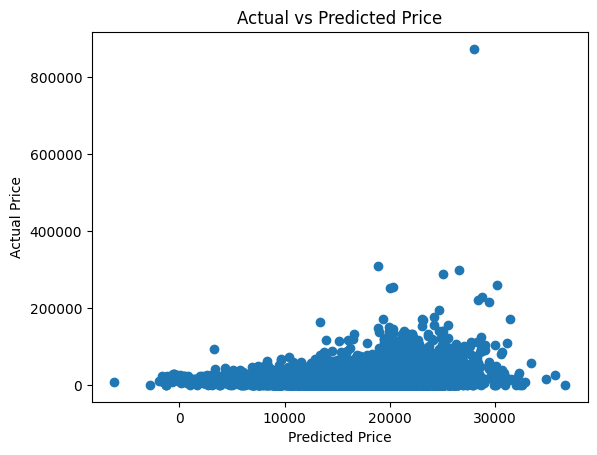

In [32]:
Y_train_np = np.asanyarray(Y_train)
X_train_pred_np = np.asanyarray(X_train_prediction)
plt.scatter(X_train_prediction,Y_train)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [33]:
#Test data prediction
X_test_predict = lin_reg_model.predict(X_test)

#r2 mean square error
X_test_error = metrics.r2_score(Y_test,X_test_predict)
print("The r2 mean square error of test data is ",X_test_error)

The r2 mean square error of test data is  0.00043664392367936955


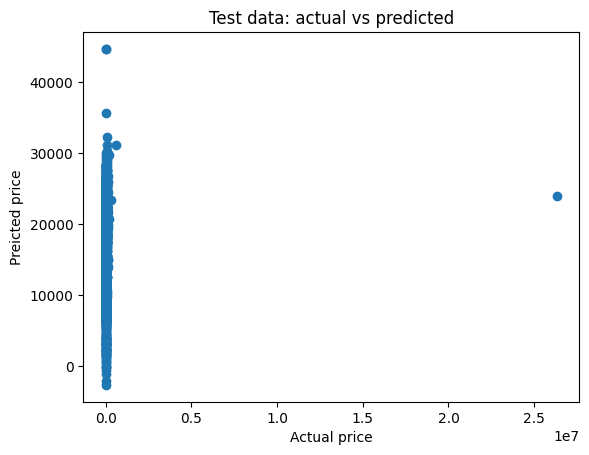

In [28]:
plt.scatter(Y_test,X_test_predict)
plt.xlabel("Actual price")
plt.ylabel("Preicted price")
plt.title("Test data: actual vs predicted")
plt.show()

Lasso Regression

In [34]:
laso_reg_model = Lasso()

In [35]:
laso_reg_model.fit(X_train, Y_train)

Lasso()

In [36]:
las_train_predicton = laso_reg_model.predict(X_train)

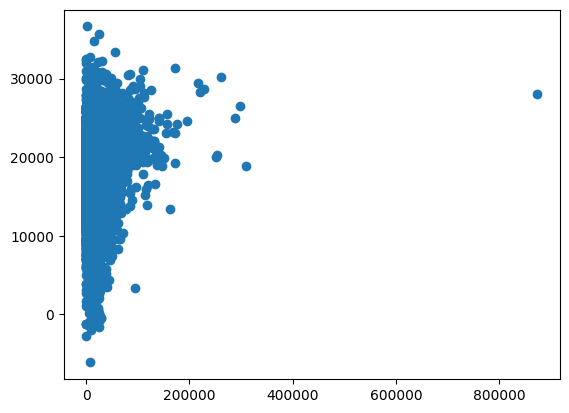

In [38]:
plt.scatter(Y_train,las_train_predicton)
plt.show()

In [39]:
las_test_predicton = laso_reg_model.predict(X_test)

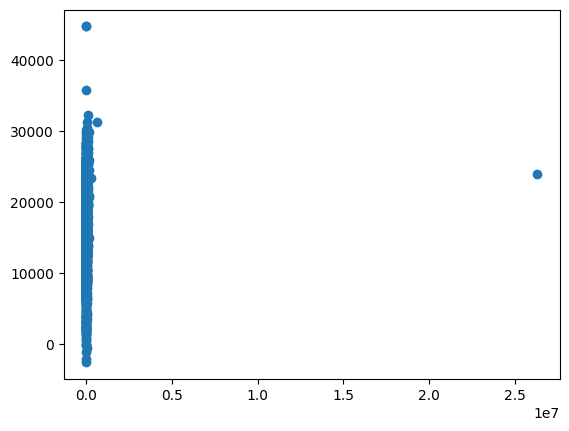

In [40]:
plt.scatter(Y_test,las_test_predicton)
plt.show()

In [41]:
#r2 mean square error
X_train_error_las = metrics.r2_score(Y_train,las_train_predicton)
print(X_train_error_las)

X_test_error_las =metrics.r2_score(Y_test,las_test_predicton)
print(X_test_error_las)

0.0725922342426858
0.00043684546651312495
